# Denoising Diffusion Probabilistic Model, in Pytorch

References:

1. [DDPM Github](https://github.com/lucidrains/denoising-diffusion-pytorch)

```
pip install denoising_diffusion_pytorch
```

# Imports and Consts

In [9]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import matplotlib.pyplot as plt
import numpy as np

# Model Definitions

In [2]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000    # number of steps
)

In [3]:
training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()

# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

/home/patryk/repos/Deep-Learning/proj3/.venv/lib/python3.10/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])

In [8]:
sampled_images[0].shape

torch.Size([3, 128, 128])

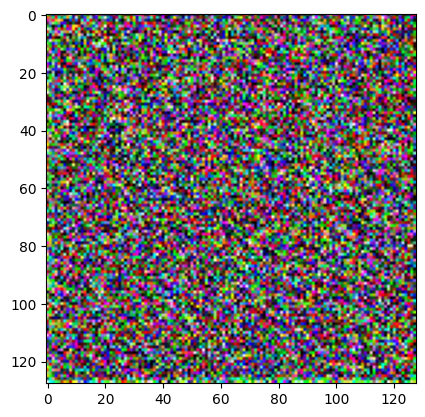

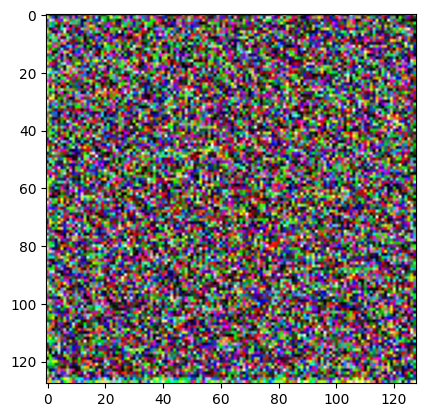

In [14]:
plt.imshow(np.squeeze(sampled_images[3]).T)
plt.show()
plt.imshow(np.squeeze(sampled_images[0]).T)
plt.show()

In [ ]:
trainer = Trainer(
    diffusion,
    'path/to/your/images',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 700000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

trainer.train() 

# Inference